In [1]:
import cv2, math, numpy as np
from math import sqrt,exp,pi
from numpy import linalg as LA,dot,zeros,copy, log10,array,amax,dstack
import matplotlib.pyplot as plt
import time                                                

def timeme(method):
    def wrapper(*args, **kw):
        startTime = int(round(time.time()))
        result = method(*args, **kw)
        endTime = int(round(time.time()))

        print(endTime - startTime,'s')
        return result

    return wrapper

In [2]:
image = cv2.imread("./images/task_1.jpg")
I = len(image);J = len(image[0]);
print(I,'x',J)

850 x 1332


166


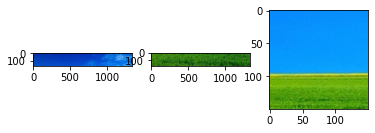

150 x 150


In [3]:
y=int(J/8);h=75;print(y)
crop_im1 = image[:y]
y = int(y*4)
crop_im2 = image[y:]
image = image[I//2-h+30:I//2+h+30, J//2-h:J//2+h]
fig, axes = plt.subplots(1, 3)
axes[0].imshow(cv2.cvtColor(crop_im1, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(crop_im2, cv2.COLOR_BGR2RGB))
axes[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
I = len(image);J = len(image[0]);
print(I,'x',J)


In [4]:
def M_σ(image):
  #image = cv2.imread(path)
  mas = array(image[0])
  for i in range(1,len(image)):
    np.vstack((mas,image[i]))
  image_n = mas
  mean = np.mean(image_n,axis=0); sigma=np.var(image_n,axis=0); cov = np.cov(mas,rowvar=False)
  print('DATA','\n','M = ',mean,'\n','σ = ',sigma,'\n', 'cov = ','\n',cov)
  return [mean,cov],image


#path1="./images/1class.jpg";path2="./images/2class.jpg";
data1,image1 = M_σ(crop_im1);data2,image2 = M_σ(crop_im2)

DATA 
 M =  [179.91966967  59.7454955    5.21771772] 
 σ =  [376.33063413 679.28132355  96.47962602] 
 cov =  
 [[376.6133769  474.77893916 121.81164222]
 [474.77893916 679.79167767 185.63321285]
 [121.81164222 185.63321285  96.55211259]]
DATA 
 M =  [ 21.2042042  124.81006006  48.85810811] 
 σ =  [373.65649884 847.59980871 727.11575258] 
 cov =  
 [[373.9372325  416.22814701 418.49706581]
 [416.22814701 848.23662299 753.3734796 ]
 [418.49706581 753.3734796  727.6620454 ]]


In [5]:
def p (x,data):
  return 1/(sqrt(LA.det(data[1]))*sqrt(2*pi)**len(x))*exp(-1/2*dot(dot((x-data[0]).T,LA.inv(data[1])),(x-data[0])))

print('P_11=',p(image1[0][0],data1),'P_12=',p(image1[0][0],data2),' | ','P_21=',p(image2[0][0],data1),'P_22=',p(image2[0][0],data2))


P_11= 3.713675568453943e-05 P_12= 1.0181353029061917e-53  |  P_21= 7.394981334065375e-273 P_22= 1.8939719305589158e-06


In [6]:
def k (x):
  p1 = p(x,data1); p2 = p(x,data2)
  if p1 > p2: return 1,p1,p1,p2
  else: return 2,p2,p1,p2

print ('K1 = ',k(image1[0][0]),'K2 = ',k(image2[0][0]))

K1 =  (1, 3.713675568453943e-05, 3.713675568453943e-05, 1.0181353029061917e-53) K2 =  (2, 1.8939719305589158e-06, 7.394981334065375e-273, 1.8939719305589158e-06)


In [7]:
@timeme
def k_p(image):
    mas_k = zeros((I,J));mas_p = zeros((I,J));mas_p1 = zeros((I,J));mas_p2 = zeros((I,J))
    for i in range(I):
      for j in range(J):
        k_im,p_im,p_im1,p_im2 = k(image[i][j]);mas_k[i][j] = k_im; mas_p[i][j] = p_im;mas_p1[i][j] = p_im1;mas_p2[i][j] = p_im2
    return mas_k,mas_p,mas_p1,mas_p2

mas_k,mas_p,mas_p1,mas_p2 = k_p(image)

4 s


In [8]:
print('MAS_K = \n',mas_k,'\n','MAS_P1 = \n',mas_p1,'\n','MAS_P2 = \n',mas_p2)

MAS_K = 
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]] 
 MAS_P1 = 
 [[4.54295922e-010 4.90766363e-010 4.90766363e-010 ... 5.69511054e-010
  6.34168246e-010 6.34168246e-010]
 [4.54295922e-010 7.24158309e-010 7.24158309e-010 ... 5.69511054e-010
  6.34168246e-010 6.34168246e-010]
 [4.76244220e-010 1.04681837e-009 7.24158309e-010 ... 5.69511054e-010
  6.34168246e-010 6.94162294e-010]
 ...
 [5.01735368e-269 3.17917821e-255 6.78813702e-266 ... 7.22156624e-241
  9.27059835e-229 8.56652187e-244]
 [2.71558360e-271 1.64977915e-250 7.44086263e-253 ... 7.69063873e-240
  7.69063873e-240 4.77773944e-252]
 [1.90831412e-260 9.28668493e-252 1.01640669e-253 ... 9.17340795e-254
  4.54405832e-250 2.99758048e-255]] 
 MAS_P2 = 
 [[2.60219447e-139 5.38880746e-140 5.38880746e-140 ... 2.03440073e-141
  9.28712608e-142 9.28712608e-142]
 [2.60219447e-139 2.00148221e-139 2.00148221e-139 ... 2.03440073e-1

In [9]:
print('MAS_P = \n',mas_p)

MAS_P = 
 [[4.54295922e-10 4.90766363e-10 4.90766363e-10 ... 5.69511054e-10
  6.34168246e-10 6.34168246e-10]
 [4.54295922e-10 7.24158309e-10 7.24158309e-10 ... 5.69511054e-10
  6.34168246e-10 6.34168246e-10]
 [4.76244220e-10 1.04681837e-09 7.24158309e-10 ... 5.69511054e-10
  6.34168246e-10 6.94162294e-10]
 ...
 [5.79861703e-07 1.28863637e-06 3.33493756e-07 ... 4.61213433e-06
  2.23269640e-06 2.61262036e-06]
 [7.03694892e-07 2.16087095e-06 2.62758573e-06 ... 2.98203861e-06
  2.98203861e-06 2.24363883e-06]
 [1.35079449e-06 4.88370768e-06 5.24869806e-06 ... 1.42941405e-06
  2.53763978e-06 2.07710827e-06]]


In [10]:
def p_k1_k2(k1,k2):
    a = 0.2
    if k1 != k2:return a
    else: return 1-a

print(p_k1_k2(1,2),p_k1_k2(1,1) ) 

0.2 0.8


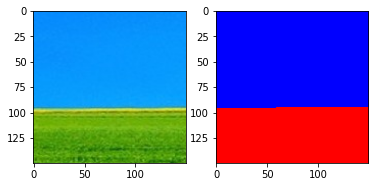

In [11]:
def r_b (image,mas_k):
#     new_image=np.zeros((I,J,3))
    new_image=copy(image)
    for i in range(I):
        for j in range(J):
            if mas_k[i][j]==1:new_image[i][j][0]=255;new_image[i][j][1]=0;new_image[i][j][2]=0
            else:new_image[i][j][0]=0;new_image[i][j][1]=0;new_image[i][j][2]=255;
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    new_img_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB) 
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(img_rgb)
    axes[1].imshow(new_img_rgb)
    plt.show()
r_b (image,mas_k)            

In [12]:
def sampling (mas_k,mas_p1,mas_p2):
    I = len(image);J = len(image[0]);mas_p1_new = zeros((I,J));mas_p2_new = zeros((I,J));mas_k_new = zeros((I,J))
    for i in range(I):
        for j in range(J):
            p1 = mas_p1[i][j]; p2 = mas_p2[i][j];
            if i+1 != I: p1*=p_k1_k2(1,mas_k[i+1][j]); p2*=p_k1_k2(2,mas_k[i+1][j]);
            if j+1 != J: p1*=p_k1_k2(1,mas_k[i][j+1]); p2*=p_k1_k2(2,mas_k[i][j+1]);
            if i-1 != -1: p1*=p_k1_k2(1,mas_k[i-1][j]); p2*=p_k1_k2(2,mas_k[i-1][j]);
            if j-1 != -1: p1*=p_k1_k2(1,mas_k[i][j-1]); p2*=p_k1_k2(2,mas_k[i][j-1]);
            N = p1+p2;mas_p1_new[i][j] = p1/N;mas_p2_new[i][j] = p2/N
            if p1>p2:mas_k_new[i][j]=1
            else:mas_k_new[i][j]=2 
    return mas_k_new,mas_p1_new,mas_p2_new
#@timeme
def sampling_n (mas_k,mas_p1,mas_p2,i,n):
    mas_k,mas_p1,mas_p2=sampling (mas_k,mas_p1,mas_p2)
    if float(i/50).is_integer():print ("I = ",i);r_b (image,mas_k)
    
    if i==n:return mas_k,mas_p1,mas_p2
    else:return sampling_n (mas_k,mas_p1,mas_p2,i+1,n)

In [13]:
#mas_k,mas_p1,mas_p2 = sampling_n (mas_k,mas_p1,mas_p2,0,1)
#print (mas_k,'\n',mas_p1,'\n',mas_p2)

In [14]:
def sampling_plus (mas_k,mas_p1,mas_p2):
    mas_p1 = log10(mas_p1);mas_p2 = log10(mas_p2);
    I = len(image);J = len(image[0]);mas_p1_new = zeros((I,J));mas_p2_new = zeros((I,J));mas_k_new = zeros((I,J))
    for i in range(I):
        for j in range(J):
            p1 = mas_p1[i][j]; p2 = mas_p2[i][j];
            if i+1 != I: p1+=log10(p_k1_k2(1,mas_k[i+1][j])); p2+=log10(p_k1_k2(2,mas_k[i+1][j]));
            if j+1 != J: p1+=log10(p_k1_k2(1,mas_k[i][j+1])); p2+=log10(p_k1_k2(2,mas_k[i][j+1]));
            if i-1 != -1: p1+=log10(p_k1_k2(1,mas_k[i-1][j])); p2+=log10(p_k1_k2(2,mas_k[i-1][j]));
            if j-1 != -1: p1+=log10(p_k1_k2(1,mas_k[i][j-1])); p2+=log10(p_k1_k2(2,mas_k[i][j-1]));
            N = p1+p2;
            mas_p1_new[i][j] = p1/N;mas_p2_new[i][j] = p2/N
            if p1>p2:mas_k_new[i][j]=1
            else:mas_k_new[i][j]=2 
    return mas_k_new,mas_p1_new,mas_p2_new
#@timeme
def sampling_plus_n (mas_k,mas_p1,mas_p2,i,n):
    mas_k,mas_p1,mas_p2 = sampling_plus (mas_k,mas_p1,mas_p2)
    if float(i/10).is_integer():print ("I = ",i);r_b (image,mas_k)
    
    if i==n:return mas_k,mas_p1,mas_p2
    else:return sampling_plus_n (mas_k,mas_p1,mas_p2,i+1,n)

C:\Users\Alex\AppData\Local\Temp/ipykernel_6224/3740284095.py:2: RuntimeWarning: divide by zero encountered in log10
  mas_p1 = log10(mas_p1);mas_p2 = log10(mas_p2);
C:\Users\Alex\AppData\Local\Temp/ipykernel_6224/3740284095.py:12: RuntimeWarning: invalid value encountered in double_scalars
  mas_p1_new[i][j] = p1/N;mas_p2_new[i][j] = p2/N


I =  0


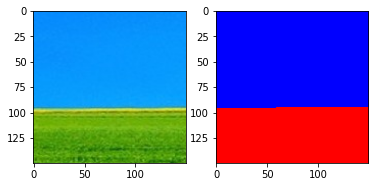

I =  10


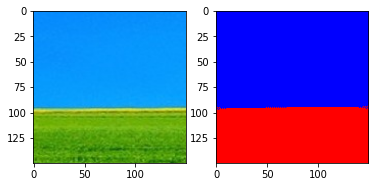

I =  20


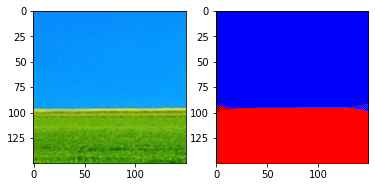

I =  30


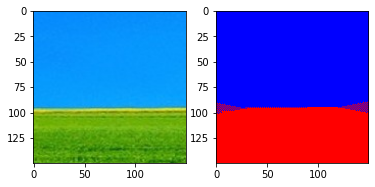

I =  40


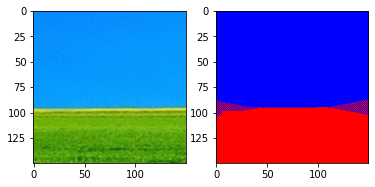

I =  50


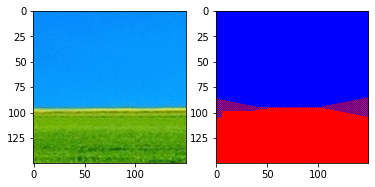

I =  60


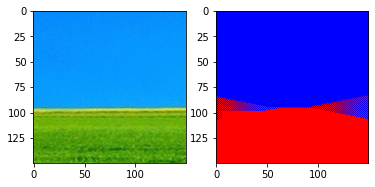

I =  70


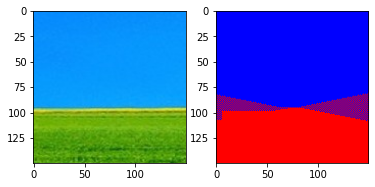

I =  80


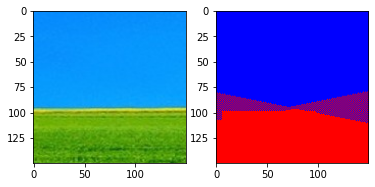

I =  90


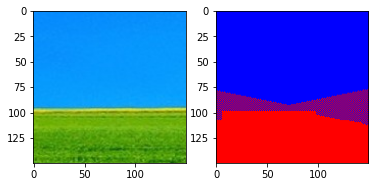

I =  100


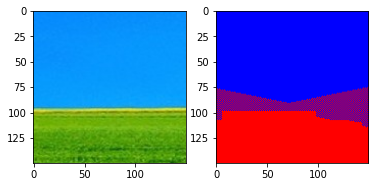

In [15]:
mas_k,mas_p1,mas_p2 = sampling_plus_n  (mas_k,mas_p1,mas_p2,0,100)

In [16]:
def MyCopy(G):
    G_n = array([])
    for g in G:
        G_n = np.append(G_n,g.copy())
    return G_n
        

In [17]:
X = zeros((I,J,2));G = array([])
for k in range(2):
    for i in range(I):
        for j in range(J):
            X[i][j][k]=I*J*k+I*i+j; G = np.append(G,{})
print('DONE_1')
for k in range(2):
    for i in range(I):
        for j in range(J):
            x=int(X[i][j][k])
            if i+1 != I:G[x][int(X[i+1][j][0])]=log10(p_k1_k2(1,mas_k[i+1][j]));G[x][int(X[i+1][j][1])]=log10(p_k1_k2(2,mas_k[i+1][j]));
            if j+1 != J:G[x][int(X[i][j+1][0])]=log10(p_k1_k2(1,mas_k[i][j+1]));G[x][int(X[i][j+1][1])]=log10(p_k1_k2(2,mas_k[i][j+1]));
            if i-1 != -1:G[x][int(X[i-1][j][0])]=log10(p_k1_k2(1,mas_k[i-1][j]));G[x][int(X[i-1][j][1])]=log10(p_k1_k2(2,mas_k[i-1][j]));
            if j-1 != -1:G[x][int(X[i][j-1][0])]=log10(p_k1_k2(1,mas_k[i][j-1]));G[x][int(X[i][j-1][1])]=log10(p_k1_k2(2,mas_k[i][j-1]));
print('DONE_2')
mas_p = dstack((mas_p1,mas_p2))
def NewG(G,mas_p):
    #G=log10(G);
    mas_p=log10(mas_p)
    G_new = MyCopy(G)
    for i in range(I):
        for j in range(J):
            L = [[i+1,j],[i,j+1],[i-1,j],[i,j-1]];
            for k in range(2):
                x=int(X[i][j][k]);n = 0;
                for l in L:
                    a=l[0];b=l[1];
                    if a!=I and a!=-1 and b!=J and b!=-1:n+=1;
                for l in L:
                    a=l[0];b=l[1];
                    for k_1 in range(2):
                        if a!=I and a!=-1 and b!=J and b!=-1: y = int(X[a][b][k_1]);G_new[x][y]=G[x][y]+mas_p[i][j][k]/n;#print(i,j,a,b); print('mas_p[',i,'][',j,'][',k,']/',n,'=',mas_p[i][j][k]/n,'X[',i,'][',j,'][',k,']','X[',a,'][',b,'][',k_1,']',G[x][y],G_new[x][y])
    for i in range(I):
        for j in range(J):
            L = [[i+1,j],[i,j+1],[i-1,j],[i,j-1]];
            for k in range(2):
                x=int(X[i][j][k]);n = 0;
                for l in L:
                    a=l[0];b=l[1];
                    if a!=I and a!=-1 and b!=J and b!=-1:n+=1;
                for l in L:
                    a=l[0];b=l[1];
                    for k_1 in range(2):
                        if a!=I and a!=-1 and b!=J and b!=-1: y = int(X[a][b][k_1]);G_new[x][y]=G_new[x][y]+G_new[y][x];G_new[y][x]=G_new[x][y]+G_new[y][x];               
    return G_new
G= NewG(G,mas_p)
#print(G[int(X[0][0][0])][int(X[0][1][0])])
def difusion(G,h):
    G_new = MyCopy(G)
    for i in range(I):
        for j in range(J):
            L = [[i+1,j],[i,j+1],[i-1,j],[i,j-1]];
            for k in range(2):
                x=int(X[i][j][k])
                S = 0;n = 0; g = 0
                for l in L:
                    a=l[0];b=l[1];
                    if a!=I and a!=-1 and b!=J and b!=-1:S+=amax(array([G[x][int(X[a][b][0])],G[x][int(X[a][b][1])]])); n+=1;
                S/= n;#print (S)
                for l in L:
                    a=l[0];b=l[1];
                    for k_1 in range(2):
                        if a!=I and a!=-1 and b!=J and b!=-1 :y = int(X[a][b][k_1]);G_new[x][y]=G[x][y]-amax(array([G[x][int(X[a][b][0])],G[x][int(X[a][b][1])]]))+S;
    #if float(h/1).is_integer():print(h)
    if h == 0: return G_new
    else: return difusion(G_new, h-1)
G_new = copy(difusion(G,1))
print('DONE_3')

DONE_1
DONE_2
DONE_3


In [18]:

def epsilation (G,eps):
    G_new = MyCopy(G);
    for i in range(I):
            for j in range(J):
                L = [[i+1,j],[i,j+1],[i-1,j],[i,j-1]];x1=int(X[i][j][0]);x2=int(X[i][j][1]);
                for l in L:
                    a=l[0];b=l[1];
                    if a!=I and a!=-1 and b!=J and b!=-1: 
                        m = amax(array([G[x1][int(X[a][b][0])],G[x1][int(X[a][b][1])],G[x2][int(X[a][b][0])],G[x2][int(X[a][b][1])]]))
                        for k1 in range(2):
                            for k2 in range(2):
                                x = int(X[i][j][k1]); y = int(X[a][b][k2]);
                                if G[x][y]+eps < m and y in G_new[x]: del G_new[x][y];#print(G[x][y]+eps,'<',m,'Y');
                                #else: print(G[x][y]+eps,'>',m);
    return G_new
#G_1 = epsilation (G)                                                          

In [19]:
def r_b_new (mas_k):
    new_image=np.zeros((I,J,3))
    for i in range(I):
        for j in range(J):
            if mas_k[i][j]==1:new_image[i][j][0]=255;new_image[i][j][1]=0;new_image[i][j][2]=0
            else:new_image[i][j][0]=0;new_image[i][j][1]=0;new_image[i][j][2]=255;
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    new_img_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB) 
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(img_rgb)
    axes[1].imshow(new_img_rgb)
    plt.show()


In [20]:
eps = 0.5
G_1 = epsilation (G,eps) 
def delete_from_G(G):
    G_new = MyCopy(G);#print('\n',G_new,'\n')
    for i in range(I):
        for j in range(J):
            for k0 in range(2):
                L = [[i+1,j],[i,j+1],[i-1,j],[i,j-1]];
                x0=int(X[i][j][k0])
                for k in range(2):
                    for l in L:
                        a=l[0];b=l[1];S=0;Z=0
                        if a!=I and a!=-1 and b!=J and b!=-1 :
                            L1 = [[a+1,b],[a,b+1],[a-1,b],[a,b-1]];L1.remove([i,j]);x=int(X[a][b][k]);
                            if x in G_new[x0]:
                                for l1 in L1:
                                    a1=l1[0];b1=l1[1];  
                                    if a1!=I and a1!=-1 and b1!=J and b1!=-1:
                                        n = 0;
                                        for k1 in range(2):
                                            y=int(X[a1][b1][k1]);
                                            if y in G_new[x]:n+=1;
                                            #print("[",i,"][",j,"]","[",a,"][",b,"]","[",a1,"][",b1,"]")
                                        if n>=1:S+=1;#print('n>=1:S+=1')
                                    if a1==I or a1==-1 or b1==J or b1==-1:Z+=1
                            if len(L1)-Z!=S and x in G_new[x0] :del G_new[x0][x];
                            if len(L1)-Z!=S and x0 in G_new[x]:del G_new[x][x0];#print(len(L1)-Z,S)#print(G_new[x0])#print(len(L1)-1-Z,S)
    for g in range(len(G)):
        #print(G_new[g],G[g])
        if G_new[g] != G[g]: return delete_from_G(G_new)
    return G_new
G_final = copy(delete_from_G(G_1))
#print ('\n\n\n\n\n',G_final)
def CheckG(G):
    ERROR=0
    for i in range(I):
        for j in range(J):
            S=0
            for k in range(2):
                x=int(X[i][j][k]);
                if len(G[x])==0:S+=1
            if S==2: print('Pixel empty');ERROR+=1;return print ('IMPOSIBLE G')
            #else:print(S)
    print('G WAS FOUND CORRECT')
CheckG(G_final)
def Mas_K_after_difusion(G):
    mas_k_G = zeros((I,J))
    for i in range(I):
        for j in range(J):
            x1=int(X[i][j][0]);x2=int(X[i][j][1]);
            if len(G[x1])!=0:mas_k_G[i][j]=1;#print(len(G[x1]),len(G[x2]))  
            else:mas_k_G[i][j] = 2;#print(len(G[x1]),len(G[x2]))
    return mas_k_G
MAS_K=Mas_K_after_difusion(G_final)


G WAS FOUND CORRECT


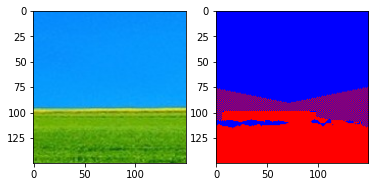

In [21]:
r_b (image,MAS_K)

In [22]:
a, b, c, d, e, f, g, h = range(8)
print(a,b,c)
N = [
{b:2, c:1, d:3, e:9, f:4}, # a
{c:4, e:3}, # b
{d:8}, # c
{e:7}, # d
{f:5}, # e
{c:2, g:2, h:2}, # f
{f:1, h:6}, # g
{f:9, g:8} # h
]
print(b in N[a],# смежность
len(N[f]),# степень
N[a][e], N[a])# вес (a, b)
N[a][g] = 10
print(N[a])

0 1 2
True 3 9 {1: 2, 2: 1, 3: 3, 4: 9, 5: 4}
{1: 2, 2: 1, 3: 3, 4: 9, 5: 4, 6: 10}


In [23]:
for a in [5,7]:
    print(a)

5
7


In [24]:
meal = [{'fats': 10, 'proteins': 10, 'carbohydrates': 80},{'fats': 10, 'proteins': 10, 'carbohydrates': 80}]
del meal[0]['fats']
print(meal)

[{'proteins': 10, 'carbohydrates': 80}, {'fats': 10, 'proteins': 10, 'carbohydrates': 80}]


In [25]:
u1= 0.2;u2=0.8
print(log10(u1),log10(u2))

-0.6989700043360187 -0.09691001300805639
